# Комаров Данил ИАД-2

## Домашнее задание 3 (10 баллов)

### О задании

В этом домашнем задании вы получите опыт подготовки данных и EDA (Exploratory Data Analysis), приблизившись к реальной работе с данными с помощью уже знакомых вам инструментов: numpy, pandas, matplotlib и seaborn.

Вы будет работать с задачей кредитного скоринга (оценка надёжности клиента). Предоставляются данные о 1000 клиентов, про которых известно около 20 признаков и положительная или отрицательная оценка в качестве кредитуемого. Эти данные нужно будет подготовить, исследовать (в том числе с помощью средств визуализации) и даже попробовать предложить какую-нибудь формулу для условной оценки надёжности клиентов исходя из предоставленных данных. Описание данных:
https://www.rdocumentation.org/packages/evtree/versions/1.0-8/topics/GermanCredit

Каждый построенный график необходимо красиво оформить - для этого требуется как минимум указать его название, а также отметить, что изображено по каждой из осей.
Также по каждому графику ожидается небольшой комментарий с выводами.

*Функции, которые могут пригодиться при оформлении графиков: `.show()`, `.title()`, `.xlabel()`, `.ylabel()`*

In [1]:
import pandas as pd

### Задание 1 (0.0 балла)

Прочитайте средствами pandas файл с данными по ссылке https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv. Выведите базовое представление таблицы (первые 5 и последние 5 строк, размер).

In [2]:
# your code here
data = pd.read_csv('https://raw.githubusercontent.com/hse-ds/iad-intro-ds/master/2022/homeworks/hw03-EDA/german_credit.csv')
data.head()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
0,no checking account,18,all credits at this bank paid back duly,car (used),1049,unknown/no savings account,< 1 yr,< 20,female : non-single or male : single,none,...,car or other,21,none,for free,1,skilled employee/official,0 to 2,no,no,good
1,no checking account,9,all credits at this bank paid back duly,others,2799,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,36,none,for free,2-3,skilled employee/official,3 or more,no,no,good
2,... < 0 DM,12,no credits taken/all credits paid back duly,retraining,841,... < 100 DM,4 <= ... < 7 yrs,25 <= ... < 35,female : non-single or male : single,none,...,unknown / no property,23,none,for free,1,unskilled - resident,0 to 2,no,no,good
3,no checking account,12,all credits at this bank paid back duly,others,2122,unknown/no savings account,1 <= ... < 4 yrs,20 <= ... < 25,male : married/widowed,none,...,unknown / no property,39,none,for free,2-3,unskilled - resident,3 or more,no,yes,good
4,no checking account,12,all credits at this bank paid back duly,others,2171,unknown/no savings account,1 <= ... < 4 yrs,< 20,male : married/widowed,none,...,car or other,38,bank,rent,2-3,unskilled - resident,0 to 2,no,yes,good


In [3]:
data.tail()

,status,duration,credit_history,purpose,amount,savings,employment_duration,installment_rate,personal_status_sex,other_debtors,...,property,age,other_installment_plans,housing,number_credits,job,people_liable,telephone,foreign_worker,credit_risk
995,no checking account,24,no credits taken/all credits paid back duly,furniture/equipment,1987,unknown/no savings account,1 <= ... < 4 yrs,25 <= ... < 35,male : married/widowed,none,...,unknown / no property,21,none,for free,1,unskilled - resident,3 or more,no,no,bad
996,no checking account,24,no credits taken/all credits paid back duly,others,2303,unknown/no savings account,>= 7 yrs,< 20,male : married/widowed,co-applicant,...,unknown / no property,45,none,rent,1,skilled employee/official,0 to 2,no,no,bad
997,... >= 200 DM / salary for at least 1 year,21,all credits at this bank paid back duly,others,12680,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,real estate,30,none,own,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
998,... < 0 DM,12,no credits taken/all credits paid back duly,furniture/equipment,6468,... >= 1000 DM,unemployed,25 <= ... < 35,male : married/widowed,none,...,real estate,52,none,rent,1,manager/self-empl./highly qualif. employee,0 to 2,yes (under customer name),no,bad
999,no checking account,30,no credits taken/all credits paid back duly,car (used),6350,... >= 1000 DM,>= 7 yrs,< 20,male : married/widowed,none,...,car or other,31,none,rent,1,skilled employee/official,0 to 2,no,no,bad


In [4]:
data.shape

(1000, 21)

### Задание 2 (0.5 балла)

Определите, есть ли пропуски в данных. Разделите признаки на количественные, бинарные, порядковые и категориальные.

In [5]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 21 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   status                   1000 non-null   object
 1   duration                 1000 non-null   int64 
 2   credit_history           1000 non-null   object
 3   purpose                  1000 non-null   object
 4   amount                   1000 non-null   int64 
 5   savings                  1000 non-null   object
 6   employment_duration      1000 non-null   object
 7   installment_rate         1000 non-null   object
 8   personal_status_sex      1000 non-null   object
 9   other_debtors            1000 non-null   object
 10  present_residence        1000 non-null   object
 11  property                 1000 non-null   object
 12  age                      1000 non-null   int64 
 13  other_installment_plans  1000 non-null   object
 14  housing                  1000 non-null   

Пропусков в данных нет

### Признаки

**Количественные**: 'duration', 'amount', 'age'

**Бинарные**: 'telephone', 'foreign_worker', 'credit_risk'

**Порядковые**: 'status', 'savings', 'employment_duration', 'installment_rate', 'present_residence', 
                'number_credits', 'people_liable'

**Категориальные**: 'credit_history', 'purpose', 'personal_status_sex', 
                    'other_debtors', 'property', 'other_installment_plans', 'housing', 'job'

### Задание 3 (0.5 балла)

Выведите среднюю сумму кредита (колонка amount) в каждой категории (колонка purpose), воспользовавшись методом groupby.

In [6]:
data.groupby('purpose', as_index=False).agg({'amount': 'mean'})

,purpose,amount
0,business,8209.333333
1,car (new),5370.223301
2,car (used),3066.983425
3,domestic appliances,2728.090909
4,furniture/equipment,2487.685714
5,others,3062.948718
6,radio/television,1498.000000
7,repairs,3180.400000
8,retraining,4158.041237
9,vacation,1205.888889


### Задание 4 (0.5 балла)


Какой процент клиентов моложе 30 лет (колонка age) снимает жилье (колонка housing)? А какой процент клиентов старше 40 лет снимает жилье?

In [7]:
print(f"Процент клиентов моложе 30 лет, которые снимают жилье:\
 {data[(data['age'] < 30) & (data['housing'] == 'rent')].shape[0] / data[data['age'] < 30].shape[0]}\n")

print(f"Процент клиентов старше 40 лет, которые снимают жилье:\
 {data[(data['age'] > 40) & (data['housing'] == 'rent')].shape[0] / data[data['age'] > 40].shape[0]}")

Процент клиентов моложе 30 лет, которые снимают жилье: 0.6666666666666666

Процент клиентов старше 40 лет, которые снимают жилье: 0.6801470588235294


### Задание 5 (0.5 балла)

 У скольких иностранцев (foreign_worker) число кредитов (number_credits) больше 3?

In [8]:
print(f"Число иностранцев, у которых кредитов больше трёх:\
 {data[(data['foreign_worker'] == 'yes') & ((data['number_credits'] == '4-5') | (data['number_credits'] == '>= 6'))].shape[0]}")

Число иностранцев, у которых кредитов больше трёх: 1


### Задание 6 (1 балл)

In [9]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

Используя numpy и matplotlib, начнём с тренировки: постройте график функций $sin(x)$ и $cos(x)$ от $-\pi$ до $\pi$ из 100 точек c легендой и сеткой. Используйте для линий разные цвета, одна из них пусть будет пунктирной. Результат в этом и следующих заданиях на построение графиков должен получиться примерно как на картинке. Содержание подписей не должно обязательно совпадать, однако осмысленные подписи должны присутствовать на графиках.

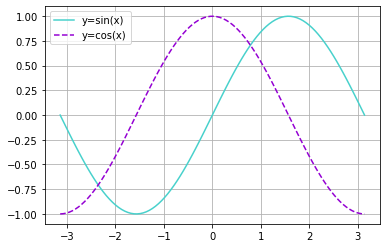

In [10]:
X = np.linspace(-np.pi, np.pi, 100)
C, S = np.cos(X), np.sin(X)

plt.plot(X, S, color='#48D1CC', label='y=sin(x)')
plt.plot(X, C, linestyle='--', color='#9400D3', label='y=cos(x)')
plt.legend(loc="upper left")
plt.grid()
plt.show()

### Задание 7 (1 балл)

Рассмотрим сравнительное количество положительных и отрицательных кейсов в зависимости от размера текущего счёта. Постройте зеркальные горизонтальные гистограммы.

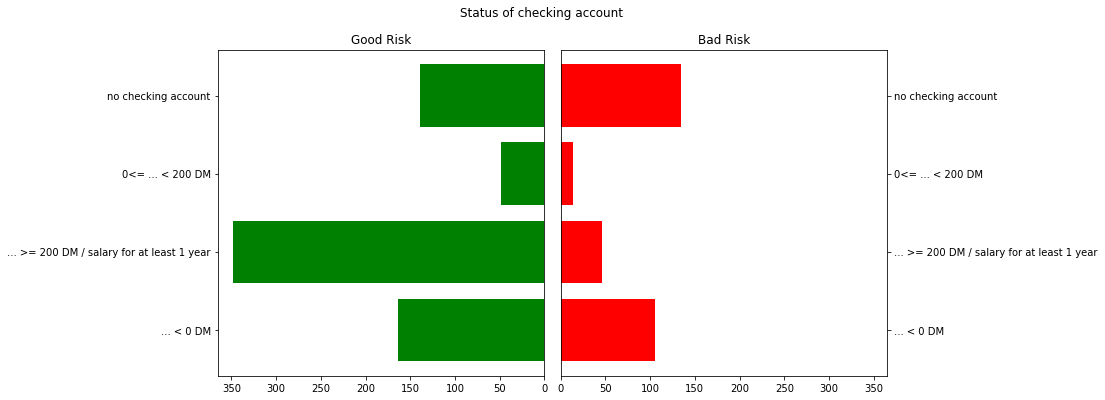

In [11]:
data_bad = data[data['credit_risk'] == 'bad']
data_good = data[data['credit_risk'] == 'good']

fig, ax = plt.subplots(1, 2, figsize=(12,6))
fig.suptitle('Status of checking account')

ax[0].barh(data_good.groupby('status').size().index, data_good.groupby('status').size().values, color='g')
ax[0].invert_xaxis()
ax[0].title.set_text('Good Risk')
ax[1].barh(data_bad.groupby('status').size().index, data_bad.groupby('status').size().values, color='r')
ax[1].set_xlim([0, 365])
ax[1].yaxis.tick_right()
ax[1].title.set_text('Bad Risk')

plt.subplots_adjust(wspace=0.05)

### Задание 8  (0.5 балла)

In [12]:
import seaborn as sns

Теперь постройте гистограмму для сравнения количества положительных и отрицательных кейсов в зависимости от размера сберегательного счёта с помощью seaborn. Какой способ вам больше нравится с точки зрения трудоёмкости написания кода? А с точки зрения восприятия результата?

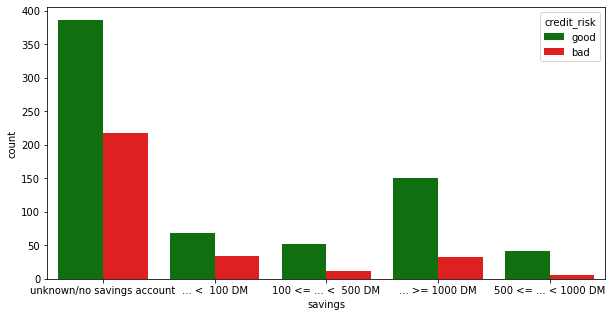

In [13]:
plt.figure(figsize=(10, 5))
sns.countplot(data=data, x='savings', hue='credit_risk', palette=['Green', 'Red']);

### Задание 9  (1 балл)

seaborn легко позволяет добавить ещё больше информации на один график. Для каждого размера сберегательного счёта мы можем оценить не только количество положительных и отрицательных кейсов, но и их распределение по возрасту, например. Постройте подходящую для этого визуализацию.

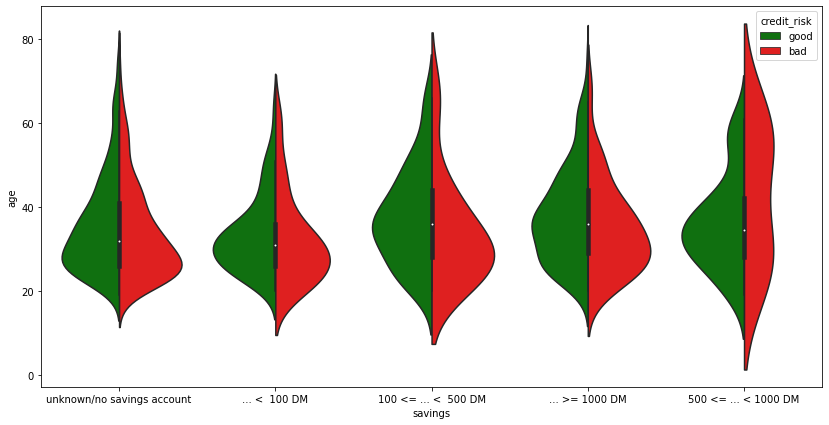

In [14]:
plt.figure(figsize=(14, 7))
sns.violinplot(x='savings', y='age', hue='credit_risk', data=data, split=True, palette=['Green', 'Red']);

### Задание 10  (0.5 балла)

Заканчивая с гистограммами, посмотрим на распределение положительных и отрицательных кейсов по возрастам, разместив их друг над другом. Добавим распределение всех взятых кредитов.

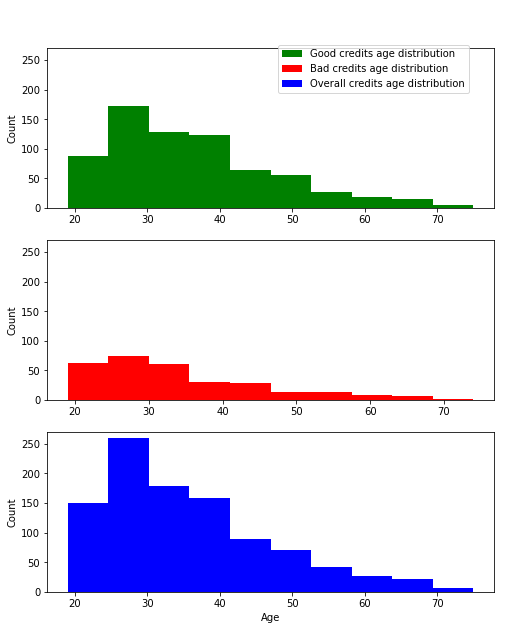

In [15]:
fig, ax = plt.subplots(3, figsize=(8, 10))

ax[0].hist(data=data[data['credit_risk'] == 'good'], x='age', color='g', label='Good credits age distribution')
ax[0].set_ylim([0, 270])
ax[0].set_ylabel('Count')
ax[1].hist(data=data[data['credit_risk'] == 'bad'], x='age', color='r', label='Bad credits age distribution')
ax[1].set_ylim([0, 270])
ax[1].set_ylabel('Count')
ax[2].hist(data=data, x='age', color='b', label='Overall credits age distribution')
ax[2].set_ylim([0, 270])
ax[2].set_ylabel('Count')
plt.xlabel("Age")

lines_labels = [ax.get_legend_handles_labels() for ax in fig.axes]
lines, labels = [sum(lol, []) for lol in zip(*lines_labels)]

fig.legend(lines, labels, borderaxespad=4.5);

### Задание 11  (0.5 балла)

Не менее полезной иногда может быть диаграмма рассеяния. Постройте такую диаграмму с продолжительностью и размерами кредитов в качестве осей. Обозначьте положительные и отрицательные кейсы разными цветами.

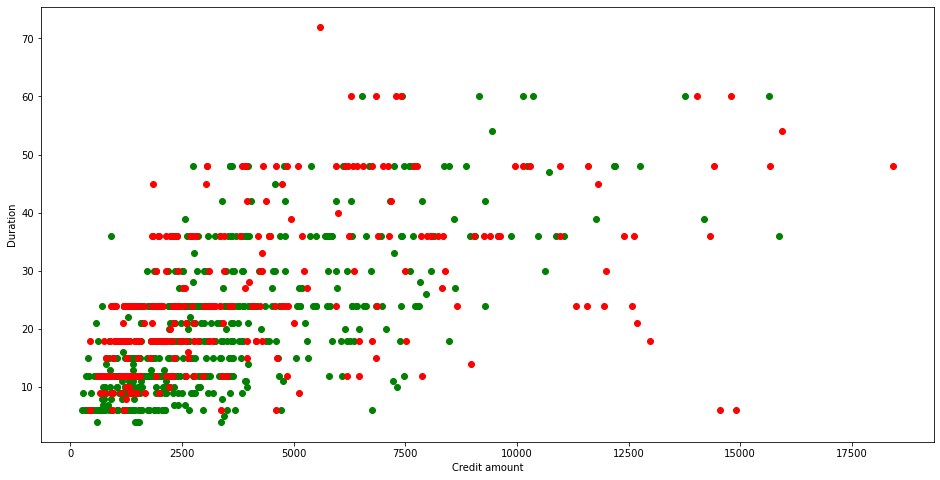

In [16]:
plt.figure(figsize=(16, 8))
plt.scatter(x='amount', y='duration', data=data[data['credit_risk'] == 'good'], color='g')
plt.scatter(x='amount', y='duration', data=data[data['credit_risk'] == 'bad'], color='r')
plt.xlabel('Credit amount')
plt.ylabel('Duration')
plt.show()

### Задание 12  (1 балл)

Продвинемся глубже. Постройте 3D версию диаграммы рассеяния, добавив ось с возрастом.

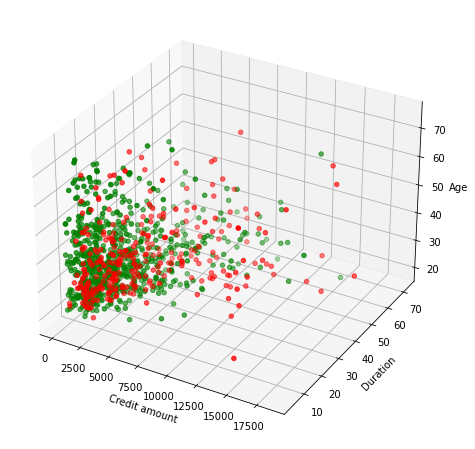

In [17]:
fig = plt.figure(figsize = (16, 8))
ax = plt.axes(projection ="3d")
 
data_good = data[data['credit_risk'] == 'good']
ax.scatter3D(data_good['amount'], data_good['duration'], data_good['age'], color='g')

data_bad = data[data['credit_risk'] == 'bad']
ax.scatter3D(data_bad['amount'], data_bad['duration'], data_bad['age'], color='r')

ax.set_xlabel('Credit amount')
ax.set_ylabel('Duration')
ax.set_zlabel('Age');

### Задание 13  (0.5 балла)

Представьте все порядковые и бинарные признаки в виде числовых значений {0, ..., n - 1}, где n это количество значений признака. Избавьтесь от категориальных признаков.

In [18]:
from sklearn.preprocessing import LabelEncoder

def encode(data, column):
    le = LabelEncoder()
    le.fit(data[column])
    data[column] = le.transform(data[column])
    return data[column]

In [19]:
# Бинарные признаки кодируем с помощью LabelEncoder
data['telephone'] = encode(data, 'telephone')
data['foreign_worker'] = encode(data, 'foreign_worker')
data['credit_risk'] = encode(data, 'credit_risk')

In [20]:
# Порядковые признаки буду кодировать вручную, нам важежн порядок, LabelEncoder этого не дает,
# он просто кодирует значения числами, не учитывая порядок

status_encode = {'no checking account': 0, '... < 0 DM': 1, '0<= ... < 200 DM': 2, 
                 '... >= 200 DM / salary for at least 1 year': 3}
data['status'] = data['status'].map(status_encode)

savings_encode = {'unknown/no savings account': 0, '... <  100 DM': 1, '100 <= ... <  500 DM': 2,
                  '500 <= ... < 1000 DM': 3, '... >= 1000 DM': 4}
data['savings'] = data['savings'].map(savings_encode)

employment_duration_encode = {'unemployed': 0, '< 1 yr': 1, '1 <= ... < 4 yrs': 2, '4 <= ... < 7 yrs': 3, '>= 7 yrs': 4}
data['employment_duration'] = data['employment_duration'].map(employment_duration_encode)

installment_rate_encode = {'< 20': 0, '20 <= ... < 25': 1, '25 <= ... < 35': 2, '>= 35': 3}
data['installment_rate'] = data['installment_rate'].map(installment_rate_encode)

present_residence_encode = {'< 1 yr': 0, '1 <= ... < 4 yrs': 1, '4 <= ... < 7 yrs': 2, '>= 7 yrs': 3}
data['present_residence'] = data['present_residence'].map(present_residence_encode)

number_credits_encode = {'1': 0, '2-3': 1, '4-5': 2, '>= 6': 3}
data['number_credits'] = data['number_credits'].map(number_credits_encode)

# Этот признак также является и бинарным, но я его отнес к порядковым, потому что тут действительно есть порядок
people_liable_encode = {'0 to 2': 0, '3 or more': 1}
data['people_liable'] = data['people_liable'].map(people_liable_encode)

In [21]:
data = pd.get_dummies(data, columns=['credit_history', 'purpose', 'personal_status_sex',
                                     'other_debtors', 'property', 'other_installment_plans',
                                     'housing', 'job'], drop_first=True)

### Задание 14  (2 балла)

По результатам предыдущего задания у вас должна получиться таблица, в которой все признаки так или иначе представлены числовыми значениями. Попробуйте придумать на основе проведённых исследований данных какую-нибудь формулу, связывающую целевую переменную с признаками, не используя готовых инструментов машинного обучения. По желанию вы можете исключить ещё какие-то признаки, или, наоборот, сформировать новые на основе имеющихся. Возможно, вы захотите отмасштабировать большие наборы численных значений некоторых признаков с помощью интервалов. Цель: реализовать функцию, которая будет принимать на вход набор признаков для объекта выборки и возвращать прогноз целевой переменной (0 или 1). Например, вы можете просто сложить все признаки и возращать ноль, если сумма отрицательная, а в противном случае единицу. Но наверняка можно придумать лучше!
Данные уже разделены на набор для обучения, который вы можете использовать как угодно, и тестовый, на котором нужно будет проверить вашу точность. Постарайтесь достичь точности хотя бы 0.6.

In [22]:
# реализую базовую версию логрега с помощью градиентного спуска
def sigmoid(z):
    return 1 / (1 + np.exp(-z))

def log_reg(X, y, num_steps, lr):
    # инициализируем веса нулями
    weights = np.zeros(X.shape[1])
    
    for step in range(num_steps):
        # матричное произведение фичей на веса (грубо говоря линейная регрессия)
        scores = np.dot(X, weights)
        # навешиваем сигмоиду и все числа переводим в [0;1]
        y_pred = sigmoid(scores)
        
        # считаем ошибку
        error = y - y_pred
        # считаем градиент ошибки
        gradient = np.dot(X.T, error) 
        # изменяем веса в сторону уменьшения ошибки
        weights += lr * gradient
        
    return weights

def predict(Xtest: np.array) -> np.array:
    # процесс обучения    
    weights = log_reg(X_train, y_train, num_steps=100000, lr=5e-4)
    
    # матричное произведение фичей на обученные веса -> навешиваем сигмоиду -> делаем маску с трэшхолдом 0.5 -> каст к int
    # y_pred - матрица предсказанных классов (0 - дот продукт < 0.5, 1 - дот продукт >= 0.5)
    y_pred = (sigmoid(np.dot(X_test, weights)) >= 0.5).astype(int)
    
    return y_pred

from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

X = data.drop(['credit_risk', 'duration', 'amount', 'age'], 1).values
y = data['credit_risk'].values

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.25, random_state=10)

accuracy_score(y_test, predict(X_test))

0.72